In [ ]:
# code k-means from scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [102]:
n_rows = 10000
n_dims = 2
n_clusters = 4
r = .1

np.random.seed(1234)
centroids = np.random.randn(n_clusters, n_dims)
data = np.vstack([centroid + r * np.random.randn(n_rows // n_clusters, n_dims) for centroid in centroids])
labels = np.arange(n_rows) * n_clusters // n_rows

In [103]:
colors = np.array(sns.color_palette())

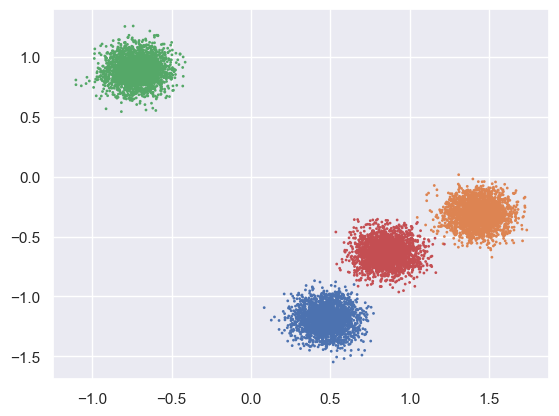

In [104]:
# _, ax = plt.subplots
plt.scatter(*data.T, s=1, c=colors[labels])

In [105]:
# k-means

In [109]:
n_iter // n_plots

20

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

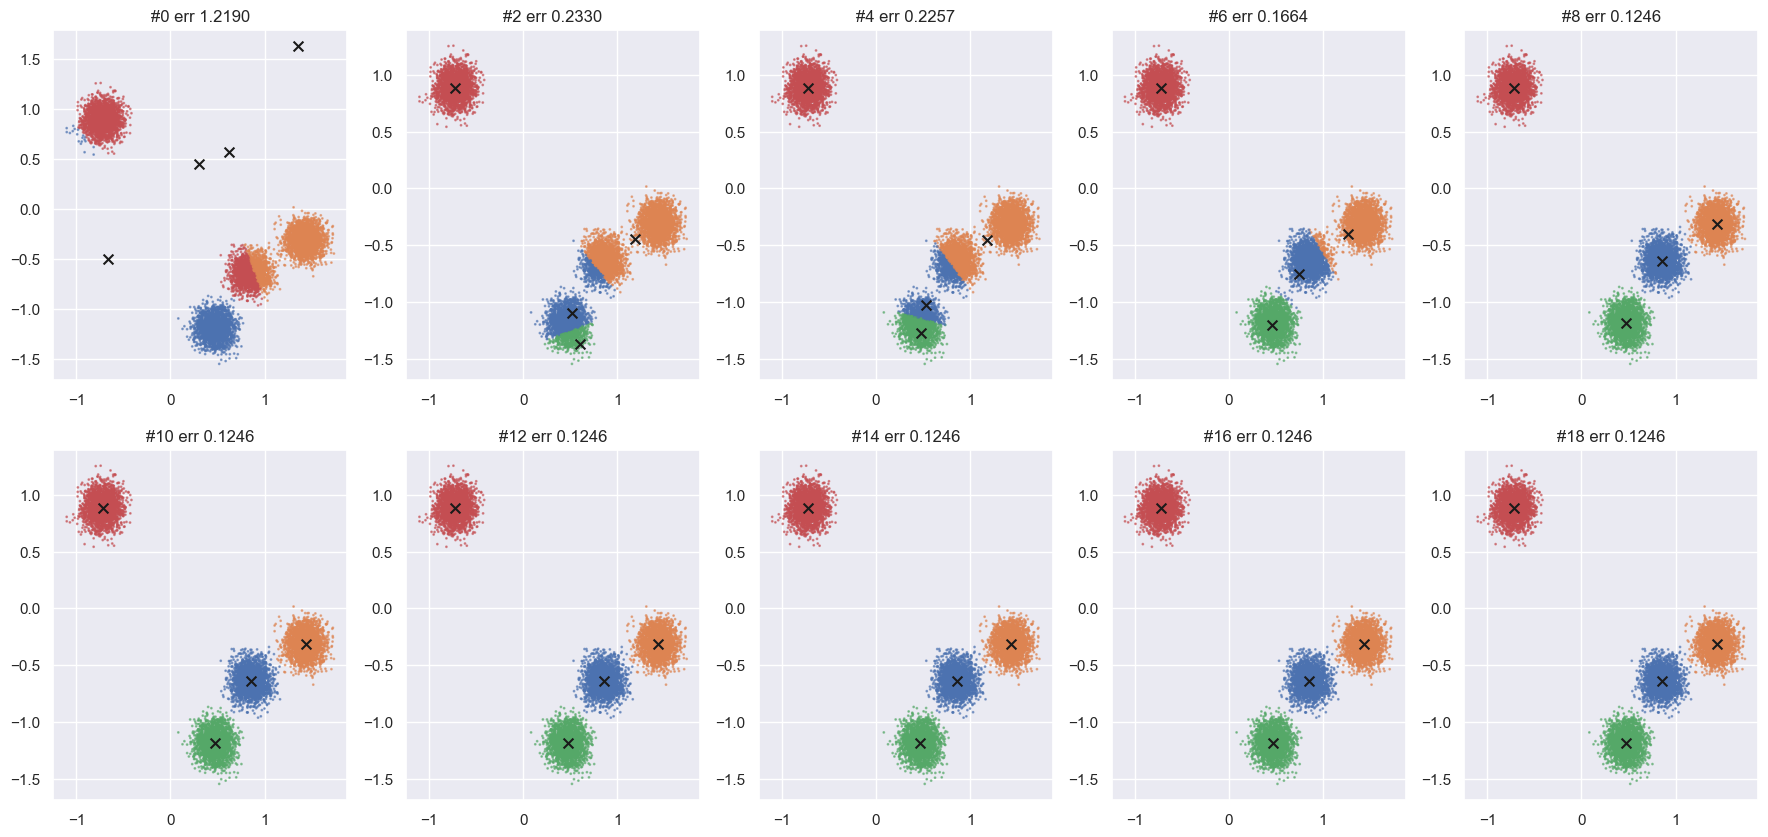

In [144]:
np.random.seed(456)
n_iter = 20
n_plots = 10
_, axs = plt.subplots(2, 5, figsize=(22, 10))
axs = axs.reshape(-1)
p_centroids = np.random.randn(n_clusters, n_dims)  # random init
# p_centroids = data.mean(axis=0) + np.random.randn(n_clusters, n_dims)  # init randomly around center
intertia = []

for i in range(n_iter):
    print(i, end=' ')
    distances = np.array([
        np.sqrt(np.square(data - p_centroid).sum(axis=1)) for i, p_centroid in enumerate(p_centroids)])
    p_clusters = np.argmin(distances, axis=0)
    err = np.min(distances, axis=0)
    intertia.append(err.mean())

    if i % (n_iter // n_plots) == 0:
        ax = axs[int(i * n_plots // n_iter)]
        ax.scatter(*data.T, s=1, c=colors[p_clusters], alpha=.6)
        ax.scatter(*p_centroids.T, marker='x', s=50, c='k')
        ax.set_title("#%d err %.4f" % (i, intertia[-1]))
    
    # compute new centroids
    for i in range(n_clusters):
        dots = data[p_clusters == i]
        if len(dots):
            p_centroids[i] = dots.mean(axis=0)
        else:
            p_centroids[i] = data[np.argmax(err)]  # data point furthest away from any cluster


(0.0, 1.5)

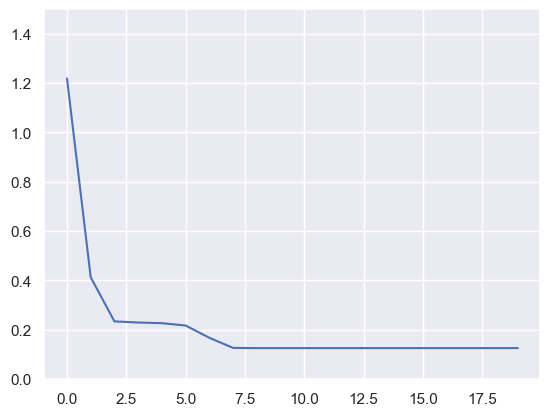

In [145]:
_, ax = plt.subplots()
ax.plot(intertia)
ax.set_ylim(0, 1.5)